**Import packages**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('D:/Work&Study/Competetions/Vodafon/Tasks/Task2/Train.csv')

# Data exploration

In [3]:
df

,sensor_reading,time_to_failure
0,12,1.469100
1,6,1.469100
2,8,1.469100
3,5,1.469100
4,8,1.469100
...,...,...
21772448,5,0.001095
21772449,5,0.001095
21772450,6,0.001095
21772451,4,0.001095


In [4]:
df.isnull().sum()

sensor_reading     0
time_to_failure    0
dtype: int64

In [5]:
df.dtypes

sensor_reading       int64
time_to_failure    float64
dtype: object

**Split the data and train the model**

In [6]:
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1:2].values

In [7]:
#X=X[0:1000000]
#Y=Y[0:1000000]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [9]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)

In [10]:
regressor.fit(X,Y)

c:\users\eng\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [11]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

c:\users\eng\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\eng\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\eng\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\eng\appdata\local\programs\python\python

KeyboardInterrupt: 

**Prediction on Validation data**

In [12]:
ypred = regressor.predict(X_test)
mse = mean_squared_error(y_test,ypred)

print("MSE: %.2f" % mse)

print("RMSE: %.2f" % np.sqrt(mse))

MSE: 0.17
RMSE: 0.41


c:\users\eng\appdata\local\programs\python\python36\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


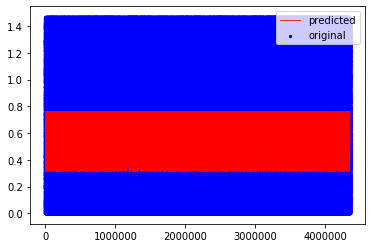

In [13]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Prediction on Validation data 

In [14]:
dft = pd.read_csv('D:/Work&Study/Competetions/Vodafon/Tasks/Task2/Test.csv')

In [15]:
dft

,sensor_reading
0,-5
1,9
2,22
3,33
4,37
...,...
9999995,-1
9999996,3
9999997,1
9999998,-2


In [16]:
Xt=dft['sensor_reading']
Xt=np.array(Xt) 
Xt=Xt.reshape(-1, 1) # since the regressor is waiting the data to be in 2D not 1D

In [17]:
Predicted_Time_To_failure = regressor.predict(Xt) 

In [18]:
print(Predicted_Time_To_failure)

[0.75756542 0.71896026 0.75604882 ... 0.70742017 0.74065112 0.71844446]


**Save the regressed Time_to_Failure into the dataframe**

In [19]:
dft['Predicted_Time_To_failure']=Predicted_Time_To_failure

In [20]:
dft

,sensor_reading,Predicted_Time_To_failure
0,-5,0.757565
1,9,0.718960
2,22,0.756049
3,33,0.735653
4,37,0.719518
...,...,...
9999995,-1,0.729573
9999996,3,0.693945
9999997,1,0.707420
9999998,-2,0.740651


In [21]:
dft.to_csv ('D:/Work&Study/Competetions/Vodafon/Tasks/Task2/Sample_submission.csv', index = None, header=True)